# Análise Exploratória de Dados: Indicadores de Segurança Pública (EUA)

## 1. Introdução
Este projeto tem como objetivo realizar uma **Análise Exploratória de Dados (EDA)** detalhada sobre indicadores de segurança pública, com foco histórico em crimes violentos (homicídios e homicídios culposos) nos Estados Unidos. Através da manipulação e visualização de dados, buscamos identificar padrões temporais, perfis demográficos e correlações entre as características dos incidentes.

A análise visa responder a perguntas chave, tais como:
* Como a taxa de crimes evoluiu ao longo das décadas (1980-2014)?
* Quais são as armas mais frequentemente utilizadas?
* Qual é o perfil demográfico predominante das vítimas e dos perpetradores?
* Existe uma relação clara entre a resolução do crime e o tipo de agência policial?

## 2. Sobre o Conjunto de Dados (Dataset)
O conjunto de dados utilizado contém mais de **638.000 registros** de crimes reportados. Cada linha representa um incidente único, detalhando informações cruciais sobre o evento, a vítima, o agressor e a agência responsável pelo registro.

### Fonte dos Dados
Os dados foram obtidos através do repositório público do Kaggle:
* **Nome do Dataset:** US Crime Dataset
* **Autor:** Ayush Agrawal
* **Link Original:** [Acessar US Crime Dataset no Kaggle](https://www.kaggle.com/datasets/mrayushagrawal/us-crime-dataset)

### Dicionário de Dados (Principais Colunas)
* **Tempo:** `Year`, `Month` (Sazonalidade e tendências anuais).
* **Geografia:** `City`, `State`, `Agency Name`.
* **Detalhes do Crime:** `Crime Type`, `Weapon`, `Crime Solved` (Indicador de resolução).
* **Demografia (Vítima/Perpetrador):** `Sex`, `Age`, `Race`, `Ethnicity`.
* **Relacionamento:** `Relationship` (Vínculo entre vítima e agressor).

---

- **Pacotes python**

In [2]:
import warnings

# Configuração para ignorar todos os warnings
warnings.filterwarnings('ignore')

import zipfile
import pandas as pd

# Configurações para exibição
# 'display.max_columns': Define para None para que o Pandas não omita colunas.
pd.set_option('display.max_columns', None)

# 'display.max_rows': Define o máximo de linhas a serem exibidas antes de truncar.
pd.set_option('display.max_rows', 30)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- **Carregando o Dataset**

In [3]:
FILE_ZIP = './US_Crime_DataSet.zip'
DATASET = 'US_Crime_DataSet.csv'

with zipfile.ZipFile(FILE_ZIP) as zf:
    with zf.open(DATASET) as file:
        df = pd.read_csv(file)


- **Estrutura dos dados**

In [4]:
print(f'Total de linhas {df.shape[0]}')
print(f'Total de colunas {df.shape[1]}')

display(df.head())
display(df.isnull().sum())
display(df.dtypes)

Total de linhas 638454
Total de colunas 24


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

- **Renomeando as colunas

In [5]:

col = {
    'Record ID': 'ID_Registro',
    'Agency Code': 'Codigo_Agencia',
    'Agency Name': 'Nome_Agencia',
    'Agency Type': 'Tipo_Agencia',
    'City': 'Cidade',
    'State': 'Estado',
    'Year': 'Ano',
    'Month': 'Mes',
    'Incident': 'Incidente',
    'Crime Type': 'Tipo_Crime',
    'Crime Solved': 'Crime_Resolvido',
    'Victim Sex': 'Vitima_Sexo',
    'Victim Age': 'Vitima_Idade',
    'Victim Race': 'Vitima_Raca',
    'Victim Ethnicity': 'Vitima_Etnia',
    'Perpetrator Sex': 'Perpetrador_Sexo',
    'Perpetrator Age': 'Perpetrador_Idade',
    'Perpetrator Race': 'Perpetrador_Raca',
    'Perpetrator Ethnicity': 'Perpetrador_Etnia',
    'Relationship': 'Relacionamento',
    'Weapon': 'Arma',
    'Victim Count': 'Contagem_Vitimas',
    'Perpetrator Count': 'Contagem_Perpetradores',
    'Record Source': 'Fonte_Registro'
}

df = df.rename(columns=col)

print("Novas colunas do DataFrame:")
print(df.columns)

Novas colunas do DataFrame:
Index(['ID_Registro', 'Codigo_Agencia', 'Nome_Agencia', 'Tipo_Agencia',
       'Cidade', 'Estado', 'Ano', 'Mes', 'Incidente', 'Tipo_Crime',
       'Crime_Resolvido', 'Vitima_Sexo', 'Vitima_Idade', 'Vitima_Raca',
       'Vitima_Etnia', 'Perpetrador_Sexo', 'Perpetrador_Idade',
       'Perpetrador_Raca', 'Perpetrador_Etnia', 'Relacionamento', 'Arma',
       'Contagem_Vitimas', 'Contagem_Perpetradores', 'Fonte_Registro'],
      dtype='object')


- **Limpando valores nulos**

In [6]:
df.dropna(inplace=True)

df.head()

,ID_Registro,Codigo_Agencia,Nome_Agencia,Tipo_Agencia,Cidade,Estado,Ano,Mes,Incidente,Tipo_Crime,Crime_Resolvido,Vitima_Sexo,Vitima_Idade,Vitima_Raca,Vitima_Etnia,Perpetrador_Sexo,Perpetrador_Idade,Perpetrador_Raca,Perpetrador_Etnia,Relacionamento,Arma,Contagem_Vitimas,Contagem_Perpetradores,Fonte_Registro
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


# Visualização dos dados

- Vítimas ao longo do tempo

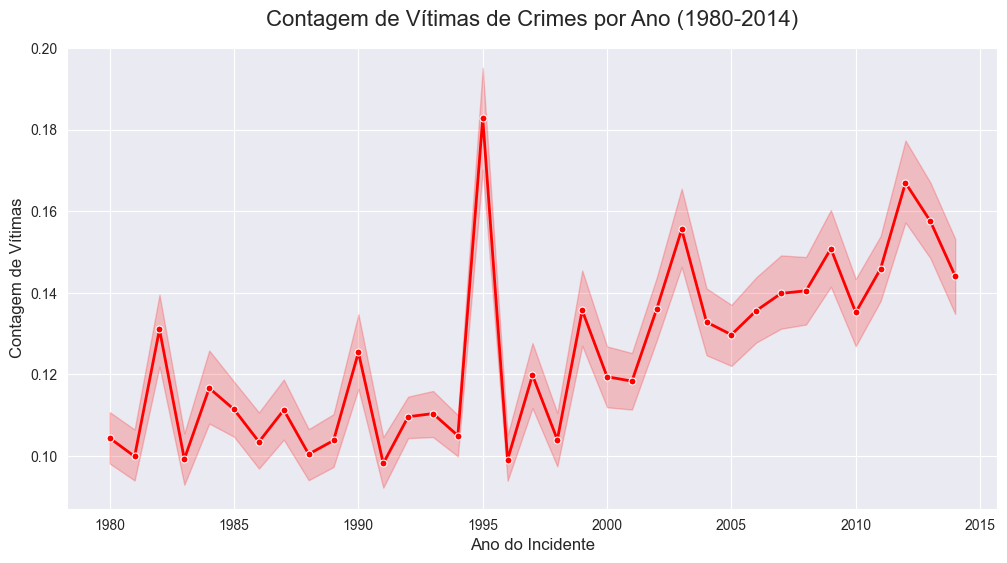

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df, x='Ano', y='Contagem_Vitimas', color='red', lw=2, marker='o', markersize=5)

ax.set_title('Contagem de Vítimas de Crimes por Ano (1980-2014)', fontsize=16, pad=15)
ax.set_xlabel('Ano do Incidente', fontsize=12)
ax.set_ylabel('Contagem de Vítimas', fontsize=12)

plt.savefig('./image/contagem_vitimas_ano.png', dpi=300)
plt.show()

- **Sexo das vítimas

Text(0.5, 0, 'Sexo das Vítimas')

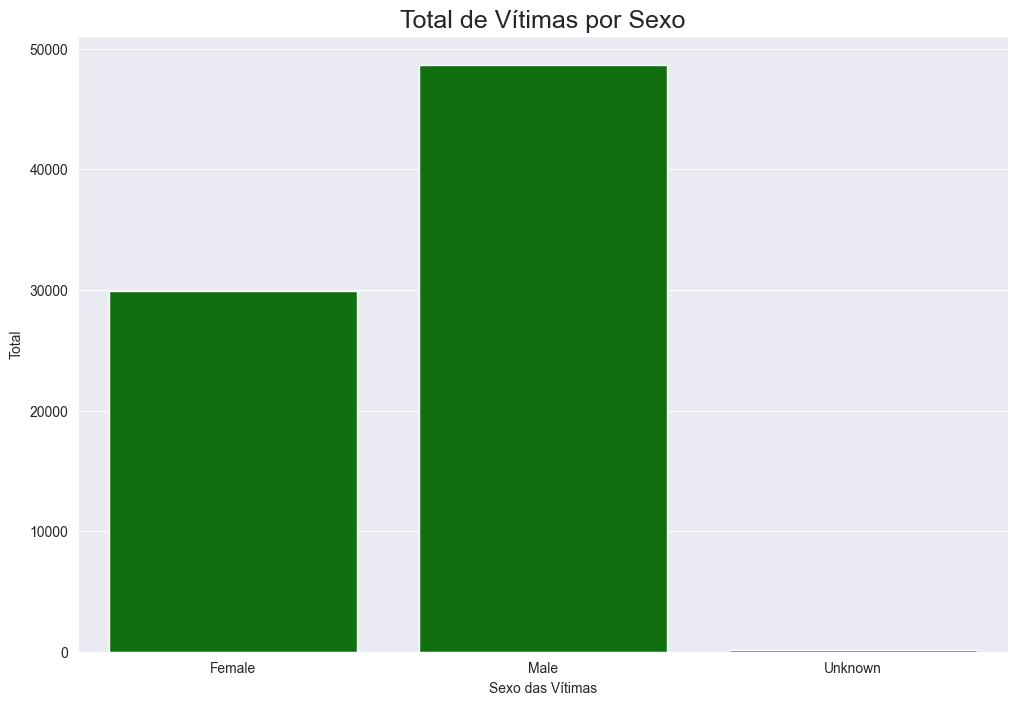

In [8]:
gender_sum = df.groupby('Vitima_Sexo')['Contagem_Vitimas'].sum()

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
ax = sns.barplot(gender_sum, color='green')
ax.set_title('Total de Vítimas por Sexo', fontsize=18)
ax.set_ylabel('Total')
ax.set_xlabel('Sexo das Vítimas')


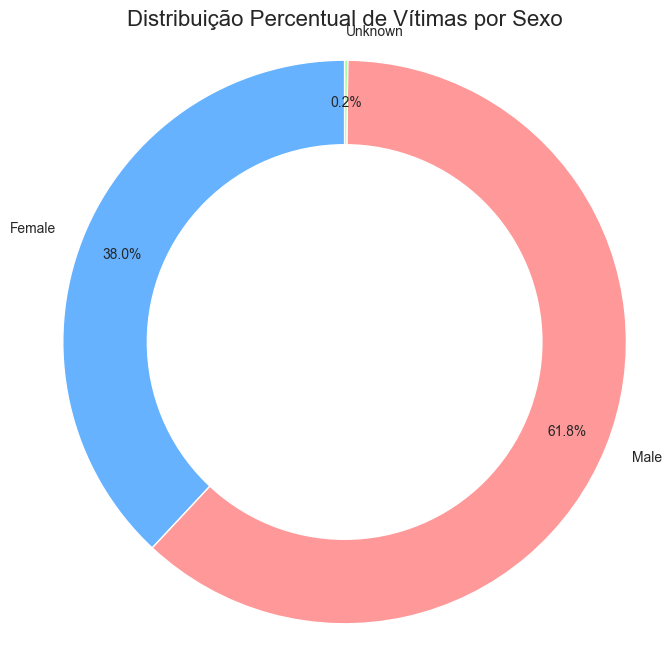

In [9]:
gender_pct = gender_sum / df.Contagem_Vitimas.sum() * 100

import matplotlib.pyplot as plt

labels = gender_pct.index.tolist()
sizes = gender_pct.values
colors = ['#66B2FF', '#FF9999', '#99FF99', '#FFCC99', '#C2C2F0']

plt.figure(figsize=(8, 8))

plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribuição Percentual de Vítimas por Sexo', fontsize=16)
plt.axis('equal')
plt.savefig('./image/distribuicao_sexo.png', dpi=300)
plt.show()

- **Idade das vítimas**

In [10]:

bins = [0, 18, 30, 40, df['Vitima_Idade'].max() + 1]
labels = ['1-18 (Jovem)', '19-30 (Adulto Jovem)', '31-40 (Adulto)', '40+ (Adulto Maduro)']

df['Faixa_Vitimas'] = pd.cut(
    df['Vitima_Idade'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)




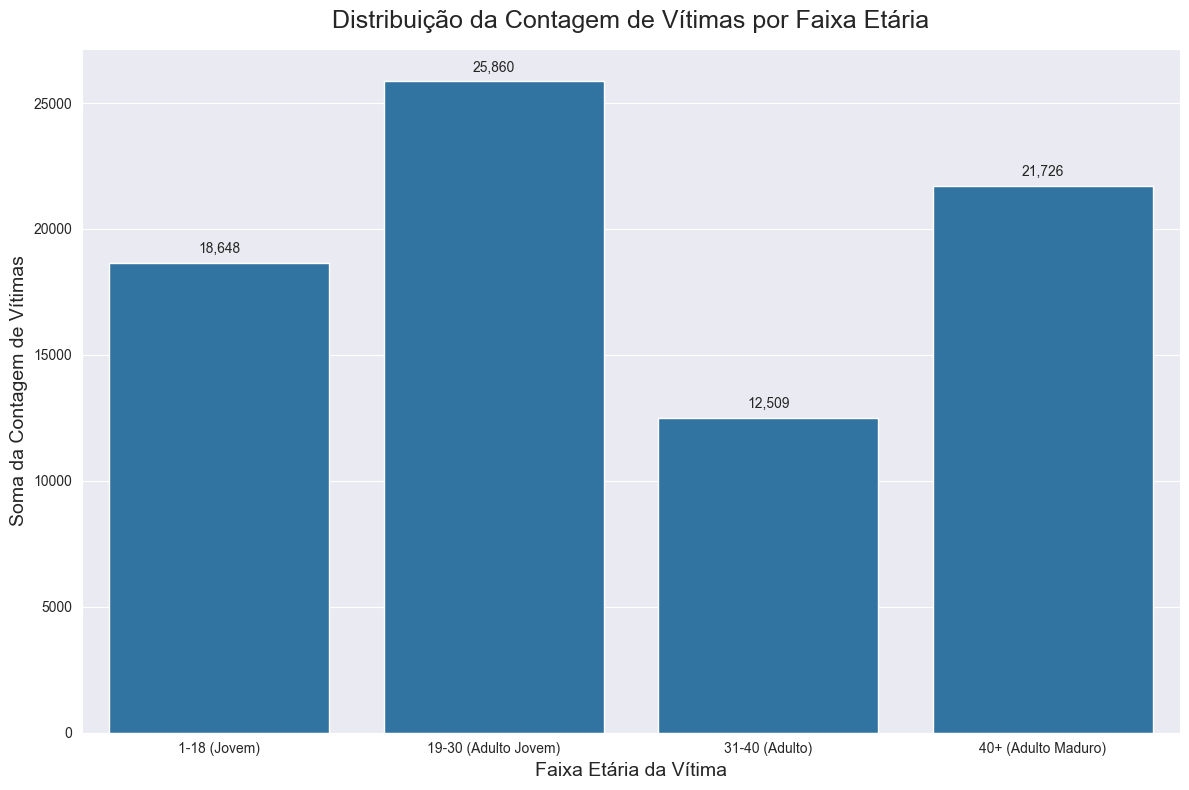

In [11]:
faixa_ordem = ['1-18 (Jovem)', '19-30 (Adulto Jovem)', '31-40 (Adulto)', '40+ (Adulto Maduro)']

sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=df,
    x='Faixa_Vitimas',
    y='Contagem_Vitimas',
    order=faixa_ordem,
    estimator=sum,
    ci=None,
    color='#1f77b4'
)

ax.set_title('Distribuição da Contagem de Vítimas por Faixa Etária', fontsize=18, pad=15)
ax.set_xlabel('Faixa Etária da Vítima', fontsize=14)
ax.set_ylabel('Soma da Contagem de Vítimas', fontsize=14)

plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.savefig('./image/distribuicao_faixa_etaria.png', dpi=300)
plt.show()

- **Cidade com mais vítimas entre 1 a 18 anos

In [12]:
age_min = df[df.Faixa_Vitimas == '1-18 (Jovem)'].groupby('Cidade')['Contagem_Vitimas'].sum().sort_values(ascending=False).head(10)

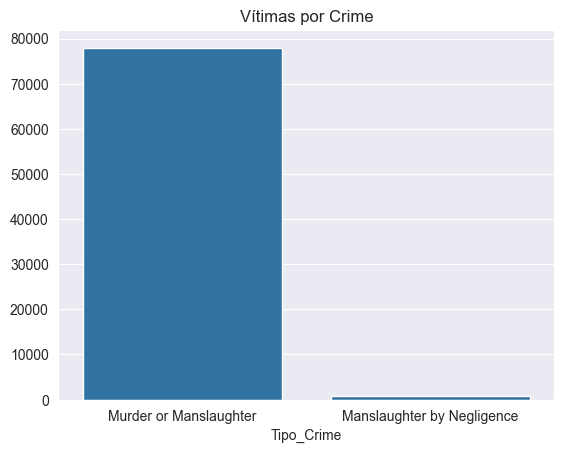

In [13]:
crime = df.groupby('Tipo_Crime')['Contagem_Vitimas'].sum().sort_values(ascending=False)

sns.set_style('darkgrid')
ax = sns.barplot(
    x=crime.index,
    y=crime.values
)

ax.set_title('Vítimas por Crime')
plt.savefig('./image/vitimas_por_crime.png', dpi=300)

- **Tipo de crimes**

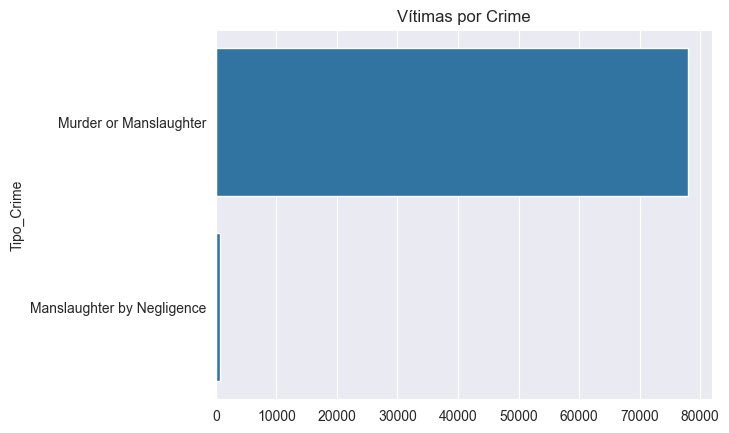

In [15]:
crime = df.groupby('Tipo_Crime')['Contagem_Vitimas'].sum().sort_values(ascending=False)

sns.set_style('darkgrid')
ax = sns.barplot(
    x=crime.values, 
    y=crime.index
)

ax.set_title('Vítimas por Crime')
plt.savefig('./image/contagem_vitimas_crime.png', dpi=300)